# Thiết lập môi trường tổng

In [1]:
import system_path

system_path.setup()

Project root set to: D:\University\HK7\IT_Project\Project\Source


# Khai báo các thư viện / module cần thiết

In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from utils.config import *
from utils.supporter import *

from data.datasets import *
from data.loader import get_data_loader

from engine.trainer import Trainer
from engine.evaluator import *

# Thiết lập cấu hình

## Cấu hình cho các mô hình

In [4]:
# Baseline
spatial_cfg = TrainingConfig('spatial', 'efficientnet')

freq_cfg = TrainingConfig('frequency', 'frequency')
freq_cfg.FREEZE_EPOCHS = 0
freq_cfg.MODEL_CONFIG['freq_dim'] = 512

# Hybrid approach
# Asymmetric - bất đối xứng
hybrid_asym_cfg = TrainingConfig('hybrid', 'efficientnet_fft_asym')
print("======Asymmetric Fusion") 
print(f"Frequency dim: {hybrid_asym_cfg.MODEL_CONFIG['freq_dim']}")
print(f"Spatial dim: {hybrid_asym_cfg.MODEL_CONFIG['spatial_dim']}")

# Aymmetric - đối xứng
hybrid_sym_cfg = TrainingConfig('hybrid', 'efficientnet_fft_sym') 
hybrid_sym_cfg.MODEL_CONFIG['freq_dim'] = 512
print("\n=====Symmetric Fusion") 
print(f"Frequency dim: {hybrid_sym_cfg.MODEL_CONFIG['freq_dim']}")
print(f"Spatial dim: {hybrid_sym_cfg.MODEL_CONFIG['spatial_dim']}")

======Asymmetric Fusion
Frequency dim: 256
Spatial dim: 512

=====Symmetric Fusion
Frequency dim: 512
Spatial dim: 512


## Thiết lập seed

In [4]:
set_seed(GlobalConfig.RANDOM_SEED, deterministic=False)

[INFO] Random seed set to 42 | deterministic=False


# Tải dữ liệu

In [5]:
# Load data
train_df = pd.read_csv(PathConfig.train_csv)
val_df = pd.read_csv(PathConfig.val_csv)
test_df = pd.read_csv(PathConfig.test_csv)

# Display first few rows of training data
print("Training Data Sample:")
train_df.head()

print("Number of training samples:", len(train_df))
print("Number of validation samples:", len(val_df))
print("Number of test samples:", len(test_df))

Training Data Sample:
Number of training samples: 14000
Number of validation samples: 2000
Number of test samples: 4000


# Khởi tạo Dataset và Data Loader

## Dataset

In [6]:
transforms_dict = get_transforms()

train_dataset = DeepFakeDataset(train_df, transform=transforms_dict['train'])
val_dataset = DeepFakeDataset(val_df, transform=transforms_dict['val'])
test_dataset = DeepFakeDataset(test_df, transform=transforms_dict['test'])

## Data Loader

In [8]:
train_loader = get_data_loader(train_dataset, True, is_train=True)
val_loader = get_data_loader(val_dataset, False, is_train=False)
test_loader = get_data_loader(test_dataset, False, is_train=False)

print("DataLoader đã được tạo thành công!")
print(f"Số batch trong tập train: {len(train_loader)}")
print(f"Số batch trong tập val: {len(val_loader)}")
print(f"Số batch trong tập test: {len(test_loader)}")

DataLoader đã được tạo thành công!
Số batch trong tập train: 875
Số batch trong tập val: 125
Số batch trong tập test: 250


## Test 1 batch của Data Loader

In [9]:
for images, labels in train_loader:
    print(f"Kích thước batch ảnh: {images.size()}")
    print(f"Kích thước batch nhãn: {labels.size()}")
    break  # Chỉ kiểm tra batch đầu tiên

Kích thước batch ảnh: torch.Size([16, 3, 240, 240])
Kích thước batch nhãn: torch.Size([16])


# Huấn luyện mô hình - Baseline

## Mô hình không gian

Huấn luyện dựa trên đặc trưng không gian (spatial feature) -> EfficientNet - B1

### Khởi tạo mô hình

In [14]:
spatial_model = build_model(spatial_cfg)

spatial_trainer = Trainer(
    spatial_model, train_loader, val_loader, spatial_cfg
)

🛠️ Building Model | Mode: spatial | Device: cuda


### Training

In [15]:
spatial_trainer.train() 


STARTING TRAINING | Mode: spatial

Epoch 1/10
[INFO] Freezing backbone at epoch 0
== Spatial Branch is now Frozen.


Validating: 100%|██████████| 125/125 [00:17<00:00,  7.14it/s]



Epoch 1/10 Summary
Train | Loss: 0.4430 | Acc: 0.8212 | F1: 0.8215
Val   | Loss: 0.3113 | Acc: 0.9005
      | Precision: 0.8498 | Recall: 0.9730 | F1: 0.9072
LR    | 0.000010
   New Best Val F1: 0.9072
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 125/125 [00:17<00:00,  7.04it/s]



Epoch 2/10 Summary
Train | Loss: 0.3886 | Acc: 0.8542 | F1: 0.8543
Val   | Loss: 0.3079 | Acc: 0.9015
      | Precision: 0.8513 | Recall: 0.9730 | F1: 0.9081
LR    | 0.000009
   New Best Val F1: 0.9081
== Best model saved.

Epoch 3/10


Validating: 100%|██████████| 125/125 [00:17<00:00,  6.99it/s]



Epoch 3/10 Summary
Train | Loss: 0.3671 | Acc: 0.8666 | F1: 0.8671
Val   | Loss: 0.2556 | Acc: 0.9330
      | Precision: 0.9039 | Recall: 0.9690 | F1: 0.9353
LR    | 0.000008
   New Best Val F1: 0.9353
== Best model saved.

Epoch 4/10
[INFO] Unfreezing backbone at epoch 3
== Spatial Branch is now Unfrozen.


Validating: 100%|██████████| 125/125 [00:18<00:00,  6.94it/s]



Epoch 4/10 Summary
Train | Loss: 0.3294 | Acc: 0.8874 | F1: 0.8877
Val   | Loss: 0.2140 | Acc: 0.9585
      | Precision: 0.9413 | Recall: 0.9780 | F1: 0.9593
LR    | 0.000008
   New Best Val F1: 0.9593
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 125/125 [00:17<00:00,  7.01it/s]



Epoch 5/10 Summary
Train | Loss: 0.2924 | Acc: 0.9085 | F1: 0.9092
Val   | Loss: 0.1962 | Acc: 0.9650
      | Precision: 0.9497 | Recall: 0.9820 | F1: 0.9656
LR    | 0.000008
   New Best Val F1: 0.9656
== Best model saved.

Epoch 6/10


Validating: 100%|██████████| 125/125 [00:18<00:00,  6.76it/s]



Epoch 6/10 Summary
Train | Loss: 0.2710 | Acc: 0.9226 | F1: 0.9230
Val   | Loss: 0.1875 | Acc: 0.9685
      | Precision: 0.9571 | Recall: 0.9810 | F1: 0.9689
LR    | 0.000007
   New Best Val F1: 0.9689
== Best model saved.

Epoch 7/10


Validating: 100%|██████████| 125/125 [00:18<00:00,  6.88it/s]



Epoch 7/10 Summary
Train | Loss: 0.2556 | Acc: 0.9306 | F1: 0.9307
Val   | Loss: 0.1707 | Acc: 0.9740
      | Precision: 0.9656 | Recall: 0.9830 | F1: 0.9742
LR    | 0.000007
   New Best Val F1: 0.9742
== Best model saved.

Epoch 8/10


Validating: 100%|██████████| 125/125 [00:17<00:00,  6.95it/s]



Epoch 8/10 Summary
Train | Loss: 0.2385 | Acc: 0.9397 | F1: 0.9399
Val   | Loss: 0.1854 | Acc: 0.9690
      | Precision: 0.9484 | Recall: 0.9920 | F1: 0.9697
LR    | 0.000006
   Epochs without F1 improvement: 1/7

Epoch 9/10


Validating: 100%|██████████| 125/125 [00:17<00:00,  7.05it/s]



Epoch 9/10 Summary
Train | Loss: 0.2325 | Acc: 0.9425 | F1: 0.9428
Val   | Loss: 0.1680 | Acc: 0.9770
      | Precision: 0.9631 | Recall: 0.9920 | F1: 0.9773
LR    | 0.000005
   New Best Val F1: 0.9773
== Best model saved.

Epoch 10/10


Validating: 100%|██████████| 125/125 [00:17<00:00,  6.99it/s]



Epoch 10/10 Summary
Train | Loss: 0.2264 | Acc: 0.9449 | F1: 0.9448
Val   | Loss: 0.1605 | Acc: 0.9775
      | Precision: 0.9668 | Recall: 0.9890 | F1: 0.9778
LR    | 0.000003
   New Best Val F1: 0.9778
== Best model saved.

Training Completed. Best F1: 0.9778
History saved to: ..\..\Outputs\efficientnet\logs\training_history.json


### Trực quan kết quả huấn luyện

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\efficientnet\logs\training_history.png


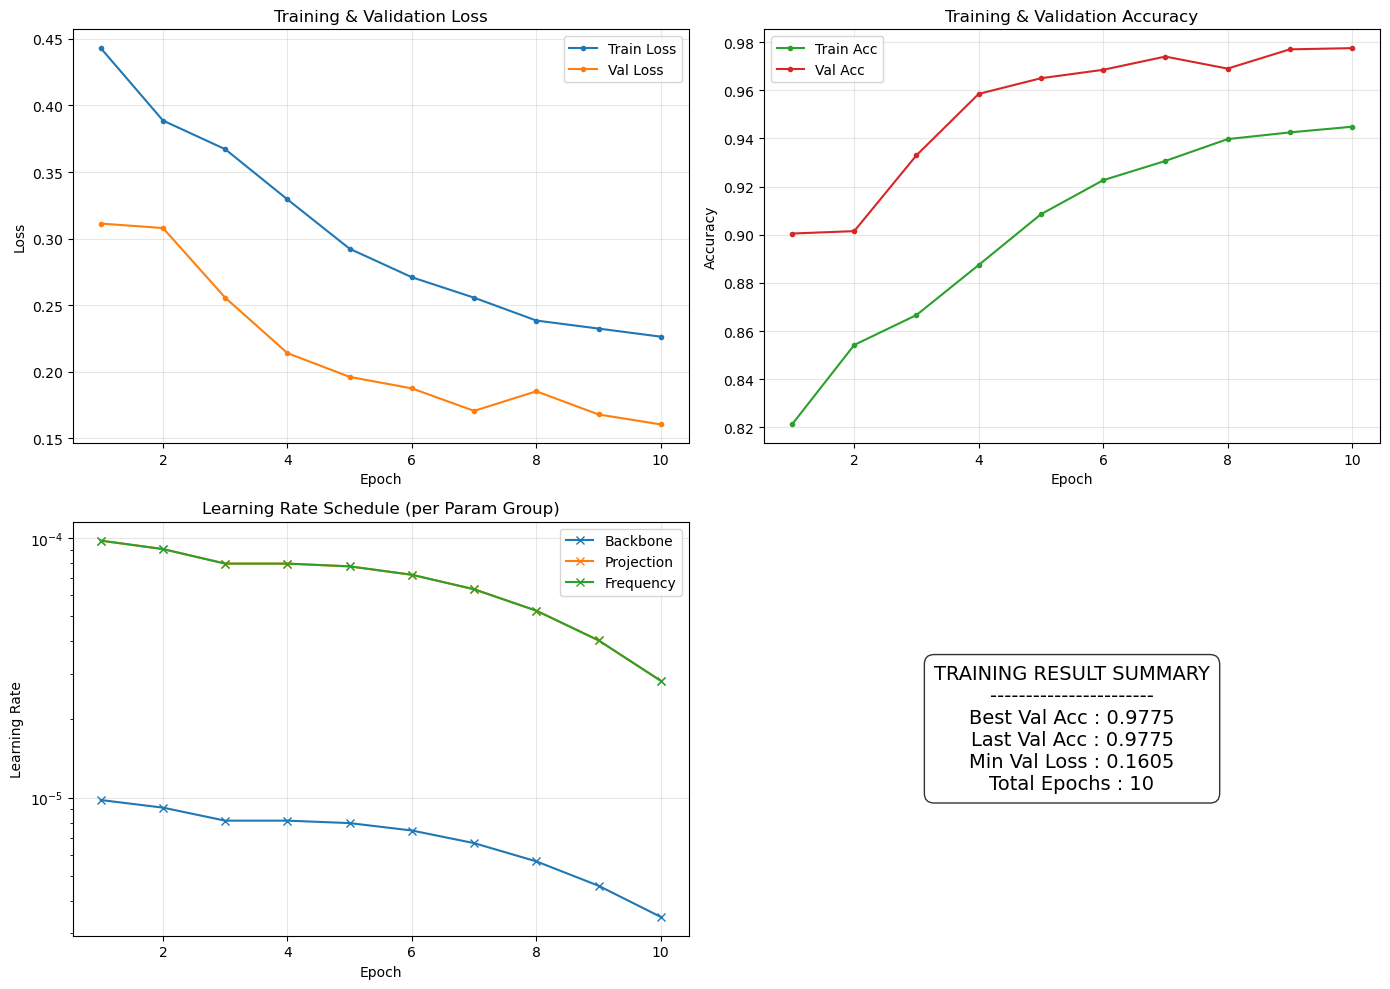

In [16]:
plot_training_history(spatial_trainer.history, spatial_cfg.LOG_DIR)

📊 Đã lưu biểu đồ Validation Metrics tại: ..\..\Outputs\efficientnet\logs\validation_metrics.png


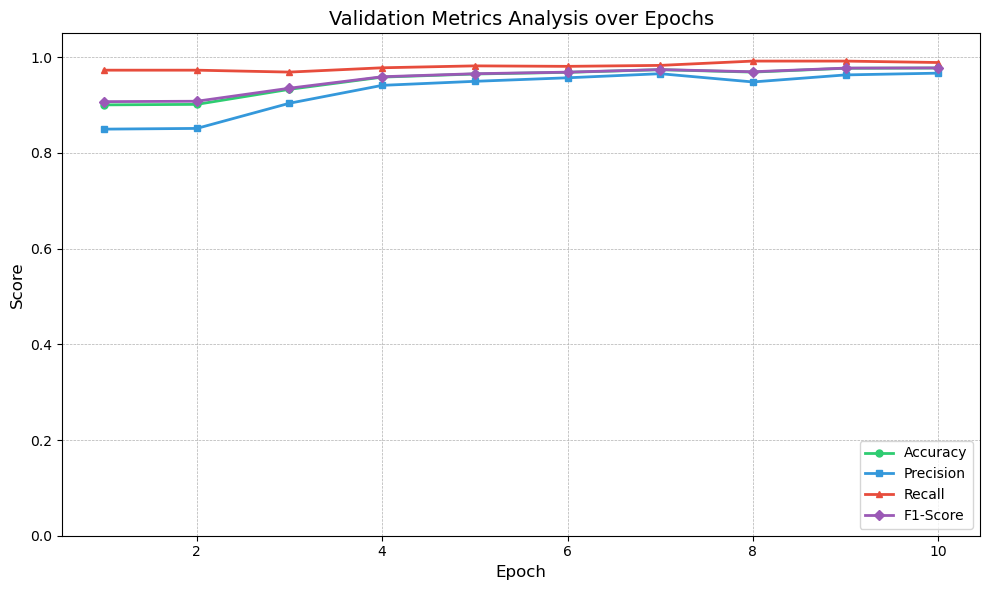

In [17]:
plot_validation_metrics(spatial_trainer.history, spatial_cfg.LOG_DIR)

### Đánh giá mô hình - Evaluate


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 250/250 [00:49<00:00,  5.02it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9792
   Precision: 0.9660
   Recall   : 0.9935
   F1 Score : 0.9795

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       0.99      0.96      0.98      2000
        Fake       0.97      0.99      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\efficientnet\logs\evaluation_results\confusion_matrix.png


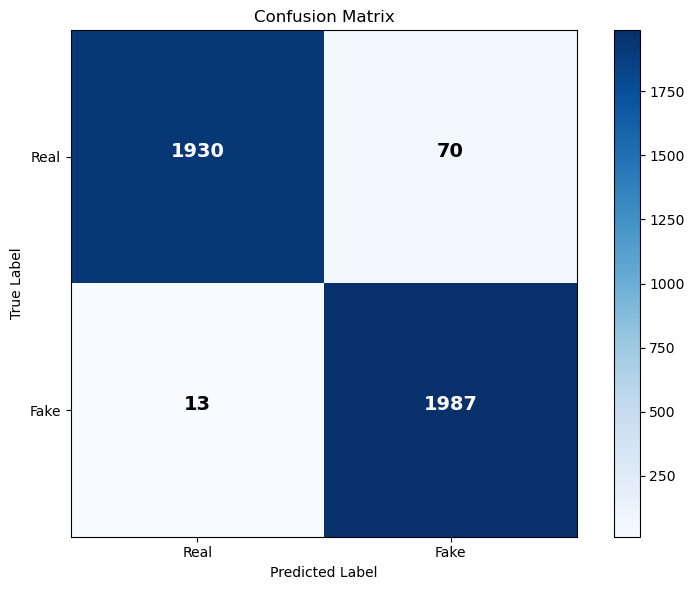

📉 Đã lưu ROC Curve tại: ..\..\Outputs\efficientnet\logs\evaluation_results\roc_curve.png


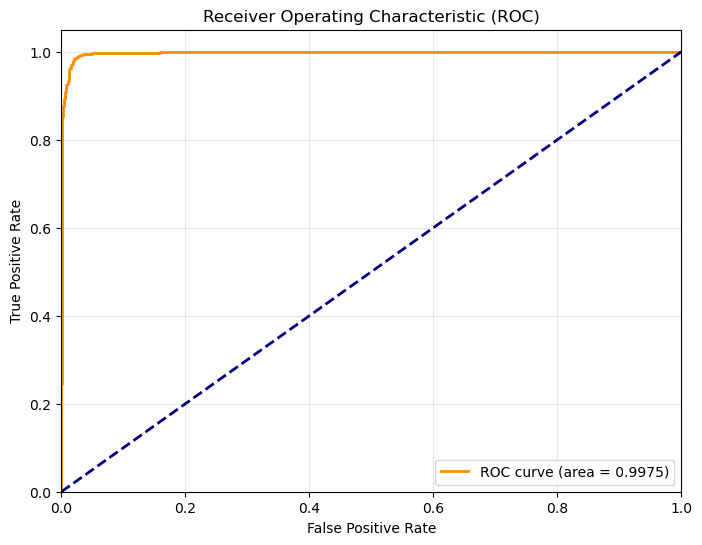

=== ROC AUC Score: 0.9975

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\efficientnet\logs\evaluation_results


In [19]:
evaluate_test_set(spatial_model, test_loader, GlobalConfig.DEVICE, spatial_cfg.LOG_DIR)

## Mô hình tần số 

Phân tích miền tần số - FFT

### Khởi tạo mô hình

In [23]:
print(f"Frequency Dimension: {freq_cfg.MODEL_CONFIG['freq_dim']}")

freq_model = build_model(freq_cfg)
freq_trainer = Trainer(
    freq_model, train_loader, val_loader, freq_cfg
)

count_parameters(freq_model)

Frequency Dimension: 512
🛠️ Building Model | Mode: frequency | Device: cuda
📊 Model Summary:
   Total parameters: 1,412,163
   Trainable parameters: 1,412,163


(1412163, 1412163)

### Training

In [24]:
freq_trainer.train()


STARTING TRAINING | Mode: frequency

Epoch 1/10


Validating: 100%|██████████| 125/125 [00:22<00:00,  5.44it/s]



Epoch 1/10 Summary
Train | Loss: 0.6648 | Acc: 0.6280 | F1: 0.6351
Val   | Loss: 0.6046 | Acc: 0.6255
      | Precision: 0.8702 | Recall: 0.2950 | F1: 0.4406
LR    | 0.000098
   New Best Val F1: 0.4406
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 125/125 [00:21<00:00,  5.69it/s]



Epoch 2/10 Summary
Train | Loss: 0.5376 | Acc: 0.7544 | F1: 0.7634
Val   | Loss: 0.3807 | Acc: 0.8745
      | Precision: 0.8193 | Recall: 0.9610 | F1: 0.8845
LR    | 0.000091
   New Best Val F1: 0.8845
== Best model saved.

Epoch 3/10


Validating: 100%|██████████| 125/125 [00:22<00:00,  5.65it/s]



Epoch 3/10 Summary
Train | Loss: 0.4852 | Acc: 0.7916 | F1: 0.7974
Val   | Loss: 0.4842 | Acc: 0.7760
      | Precision: 0.6917 | Recall: 0.9960 | F1: 0.8164
LR    | 0.000080
   Epochs without F1 improvement: 1/7

Epoch 4/10


Validating: 100%|██████████| 125/125 [00:26<00:00,  4.74it/s]



Epoch 4/10 Summary
Train | Loss: 0.4697 | Acc: 0.8007 | F1: 0.8067
Val   | Loss: 0.3377 | Acc: 0.8925
      | Precision: 0.8398 | Recall: 0.9700 | F1: 0.9002
LR    | 0.000066
   New Best Val F1: 0.9002
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]



Epoch 5/10 Summary
Train | Loss: 0.4523 | Acc: 0.8111 | F1: 0.8163
Val   | Loss: 0.3651 | Acc: 0.8665
      | Precision: 0.7982 | Recall: 0.9810 | F1: 0.8802
LR    | 0.000051
   Epochs without F1 improvement: 1/7

Epoch 6/10


Validating: 100%|██████████| 125/125 [00:23<00:00,  5.28it/s]



Epoch 6/10 Summary
Train | Loss: 0.4308 | Acc: 0.8269 | F1: 0.8326
Val   | Loss: 0.3439 | Acc: 0.8860
      | Precision: 0.8316 | Recall: 0.9680 | F1: 0.8946
LR    | 0.000035
   Epochs without F1 improvement: 2/7

Epoch 7/10


Validating: 100%|██████████| 125/125 [00:22<00:00,  5.57it/s]



Epoch 7/10 Summary
Train | Loss: 0.4171 | Acc: 0.8366 | F1: 0.8425
Val   | Loss: 0.3447 | Acc: 0.8795
      | Precision: 0.8144 | Recall: 0.9830 | F1: 0.8908
LR    | 0.000021
   Epochs without F1 improvement: 3/7

Epoch 8/10


Validating: 100%|██████████| 125/125 [00:22<00:00,  5.47it/s]



Epoch 8/10 Summary
Train | Loss: 0.4076 | Acc: 0.8378 | F1: 0.8411
Val   | Loss: 0.3527 | Acc: 0.8740
      | Precision: 0.8081 | Recall: 0.9810 | F1: 0.8862
LR    | 0.000010
   Epochs without F1 improvement: 4/7

Epoch 9/10


Validating: 100%|██████████| 125/125 [00:26<00:00,  4.78it/s]



Epoch 9/10 Summary
Train | Loss: 0.3949 | Acc: 0.8471 | F1: 0.8515
Val   | Loss: 0.3612 | Acc: 0.8735
      | Precision: 0.8049 | Recall: 0.9860 | F1: 0.8863
LR    | 0.000003
   Epochs without F1 improvement: 5/7

Epoch 10/10


Validating: 100%|██████████| 125/125 [00:24<00:00,  5.07it/s]


Epoch 10/10 Summary
Train | Loss: 0.3911 | Acc: 0.8481 | F1: 0.8527
Val   | Loss: 0.3242 | Acc: 0.8910
      | Precision: 0.8348 | Recall: 0.9750 | F1: 0.8994
LR    | 0.000001
   Epochs without F1 improvement: 6/7

Training Completed. Best F1: 0.9002
History saved to: ..\..\Outputs\frequency\logs\training_history.json


### Trực quan quá trình huấn luyện  

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\frequency\logs\training_history.png


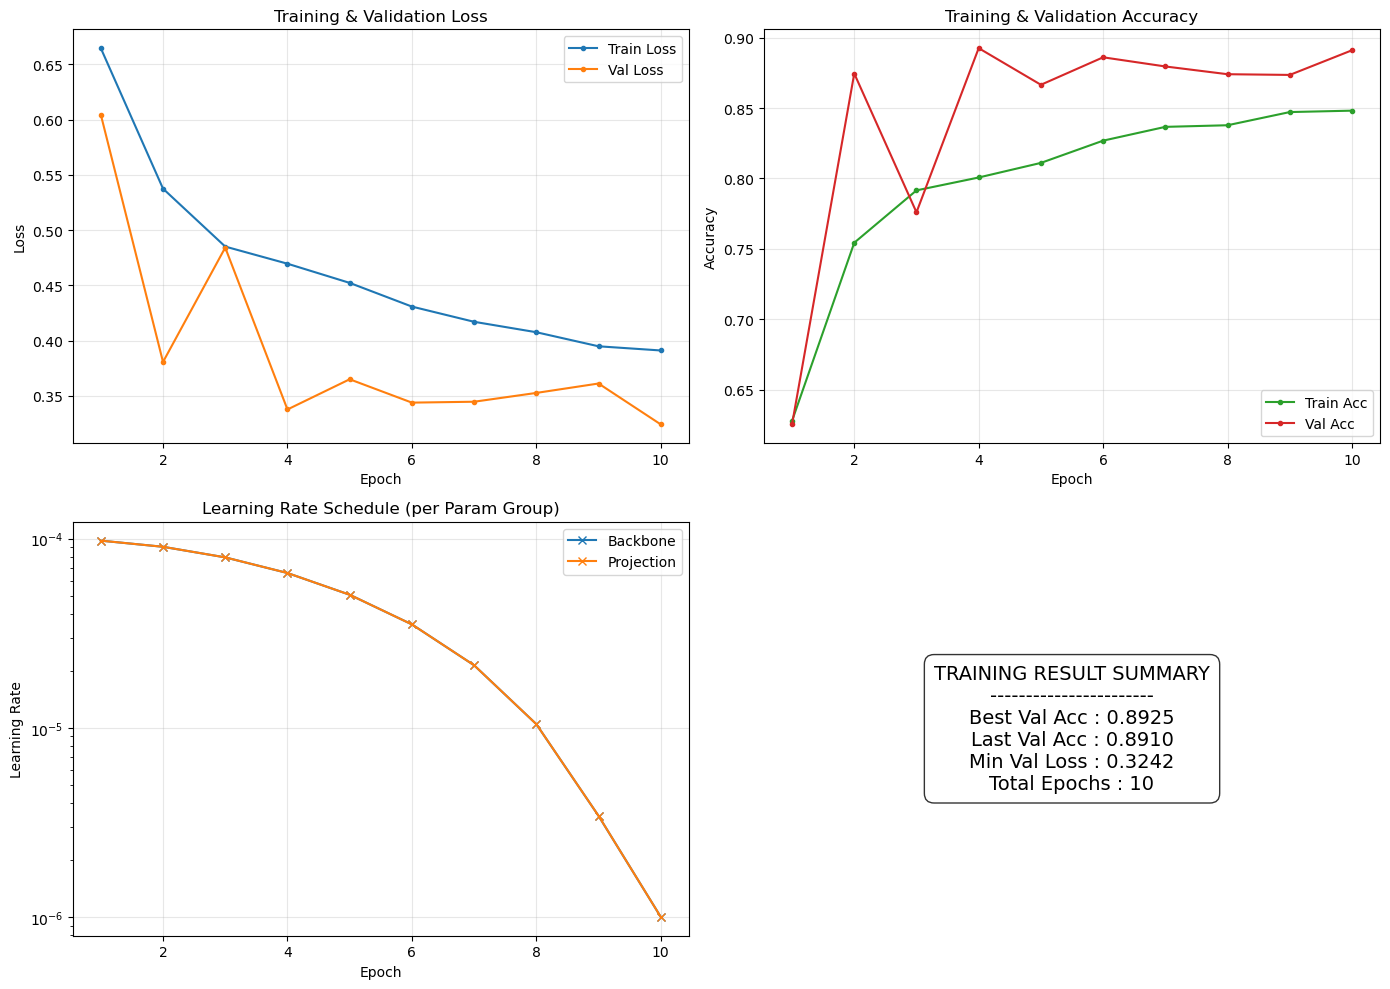

In [25]:
plot_training_history(freq_trainer.history, freq_cfg.LOG_DIR)

📊 Đã lưu biểu đồ Validation Metrics tại: ..\..\Outputs\frequency\logs\validation_metrics.png


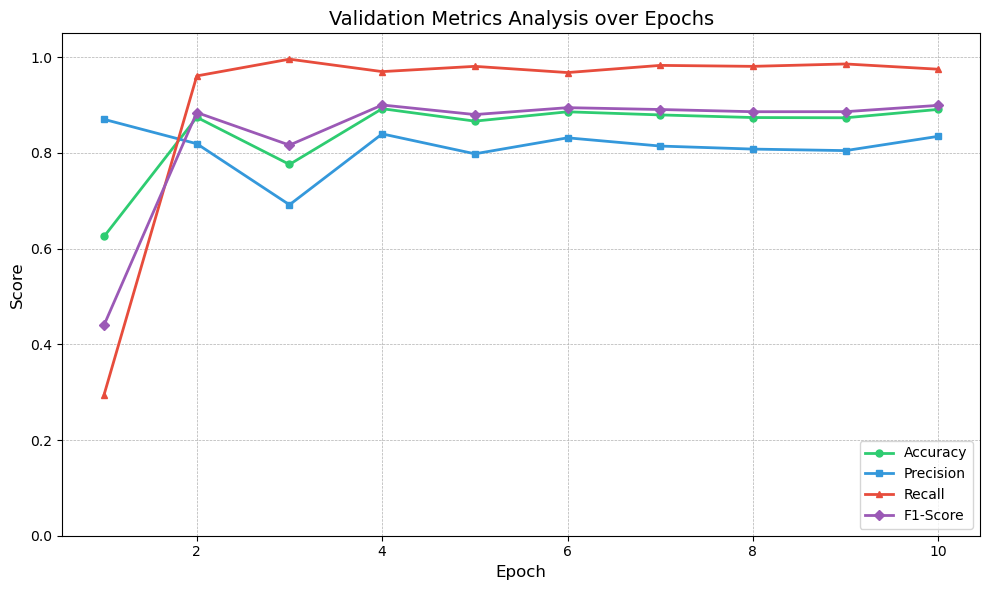

In [26]:
plot_validation_metrics(freq_trainer.history, freq_cfg.LOG_DIR)

### Đánh giá mô hình - Evaluate


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 250/250 [00:50<00:00,  4.91it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.8800
   Precision: 0.8172
   Recall   : 0.9790
   F1 Score : 0.8908

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       0.97      0.78      0.87      2000
        Fake       0.82      0.98      0.89      2000

    accuracy                           0.88      4000
   macro avg       0.90      0.88      0.88      4000
weighted avg       0.90      0.88      0.88      4000

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\frequency\logs\evaluation_results\confusion_matrix.png


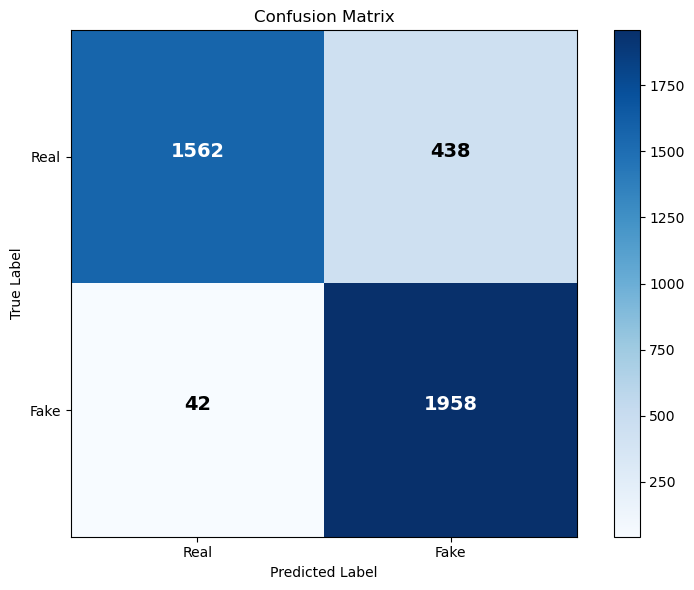

📉 Đã lưu ROC Curve tại: ..\..\Outputs\frequency\logs\evaluation_results\roc_curve.png


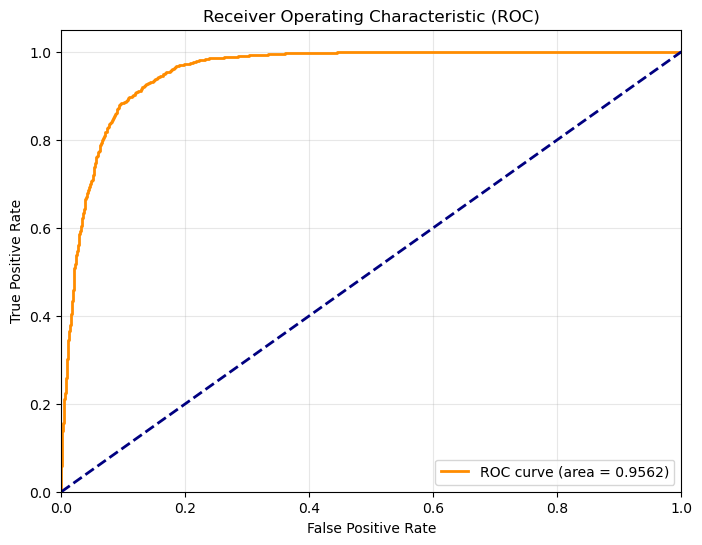

=== ROC AUC Score: 0.9562

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\frequency\logs\evaluation_results


In [29]:
evaluate_test_set(freq_model, test_loader, GlobalConfig.DEVICE, freq_cfg.LOG_DIR)

# Huấn luyện mô hình kết hợp

## Mô hình bất đối xứng 

### Khởi tạo mô hình - Asymmetric

In [9]:
print(f"Model name: {hybrid_asym_cfg.MODEL_NAME}")
print(f"Frequency dimension: {hybrid_asym_cfg.MODEL_CONFIG['freq_dim']}")
print(f"Spatial dimension: {hybrid_asym_cfg.MODEL_CONFIG['spatial_dim']}")
print(hybrid_asym_cfg.MODEL_CONFIG['use_attention_fusion'])

hybrid_asym_model = build_model(hybrid_asym_cfg)

hybrid_asym_trainer = Trainer(
    hybrid_asym_model, train_loader, val_loader, hybrid_asym_cfg
)

Model name: efficientnet_fft_asym
Frequency dimension: 256
Spatial dimension: 512
True
🛠️ Building Model | Mode: hybrid | Device: cuda


### Training

In [10]:
hybrid_asym_trainer.train()


STARTING TRAINING | Mode: hybrid

Epoch 1/10
[INFO] Freezing backbone at epoch 0
== Spatial Branch is now Frozen.


Validating: 100%|██████████| 125/125 [00:23<00:00,  5.43it/s]



Epoch 1/10 Summary
Train | Loss: 0.4643 | Acc: 0.8078 | F1: 0.8086
Val   | Loss: 0.2798 | Acc: 0.9190
      | Precision: 0.9044 | Recall: 0.9370 | F1: 0.9204
LR    | 0.000010
   New Best Val F1: 0.9204
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 125/125 [00:22<00:00,  5.60it/s]



Epoch 2/10 Summary
Train | Loss: 0.3899 | Acc: 0.8541 | F1: 0.8542
Val   | Loss: 0.2877 | Acc: 0.9145
      | Precision: 0.8691 | Recall: 0.9760 | F1: 0.9195
LR    | 0.000009
   Epochs without F1 improvement: 1/7

Epoch 3/10


Validating: 100%|██████████| 125/125 [00:23<00:00,  5.26it/s]



Epoch 3/10 Summary
Train | Loss: 0.3833 | Acc: 0.8596 | F1: 0.8598
Val   | Loss: 0.2907 | Acc: 0.9070
      | Precision: 0.8570 | Recall: 0.9770 | F1: 0.9131
LR    | 0.000008
   Epochs without F1 improvement: 2/7

Epoch 4/10
[INFO] Unfreezing backbone at epoch 3
== Spatial Branch is now Unfrozen.


Validating: 100%|██████████| 125/125 [00:54<00:00,  2.29it/s]



Epoch 4/10 Summary
Train | Loss: 0.3307 | Acc: 0.8879 | F1: 0.8881
Val   | Loss: 0.2252 | Acc: 0.9500
      | Precision: 0.9221 | Recall: 0.9830 | F1: 0.9516
LR    | 0.000008
   New Best Val F1: 0.9516
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]



Epoch 5/10 Summary
Train | Loss: 0.2942 | Acc: 0.9096 | F1: 0.9100
Val   | Loss: 0.2091 | Acc: 0.9565
      | Precision: 0.9286 | Recall: 0.9890 | F1: 0.9579
LR    | 0.000008
   New Best Val F1: 0.9579
== Best model saved.

Epoch 6/10


Validating: 100%|██████████| 125/125 [00:54<00:00,  2.30it/s]



Epoch 6/10 Summary
Train | Loss: 0.2638 | Acc: 0.9275 | F1: 0.9276
Val   | Loss: 0.1889 | Acc: 0.9665
      | Precision: 0.9439 | Recall: 0.9920 | F1: 0.9673
LR    | 0.000007
   New Best Val F1: 0.9673
== Best model saved.

Epoch 7/10


Validating: 100%|██████████| 125/125 [01:19<00:00,  1.57it/s]



Epoch 7/10 Summary
Train | Loss: 0.2541 | Acc: 0.9334 | F1: 0.9336
Val   | Loss: 0.1707 | Acc: 0.9740
      | Precision: 0.9620 | Recall: 0.9870 | F1: 0.9743
LR    | 0.000007
   New Best Val F1: 0.9743
== Best model saved.

Epoch 8/10


Validating: 100%|██████████| 125/125 [01:38<00:00,  1.26it/s]



Epoch 8/10 Summary
Train | Loss: 0.2383 | Acc: 0.9424 | F1: 0.9427
Val   | Loss: 0.1671 | Acc: 0.9750
      | Precision: 0.9648 | Recall: 0.9860 | F1: 0.9753
LR    | 0.000006
   New Best Val F1: 0.9753
== Best model saved.

Epoch 9/10


Validating: 100%|██████████| 125/125 [01:24<00:00,  1.49it/s]



Epoch 9/10 Summary
Train | Loss: 0.2250 | Acc: 0.9497 | F1: 0.9500
Val   | Loss: 0.1637 | Acc: 0.9765
      | Precision: 0.9676 | Recall: 0.9860 | F1: 0.9767
LR    | 0.000005
   New Best Val F1: 0.9767
== Best model saved.

Epoch 10/10


Validating: 100%|██████████| 125/125 [01:23<00:00,  1.49it/s]



Epoch 10/10 Summary
Train | Loss: 0.2227 | Acc: 0.9512 | F1: 0.9514
Val   | Loss: 0.1584 | Acc: 0.9820
      | Precision: 0.9716 | Recall: 0.9930 | F1: 0.9822
LR    | 0.000003
   New Best Val F1: 0.9822
== Best model saved.

Training Completed. Best F1: 0.9822
History saved to: ..\..\Outputs\efficientnet_fft_asym\logs\training_history.json


### Trực quan kết quả huấn luyện

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\efficientnet_fft_asym\logs\training_history.png


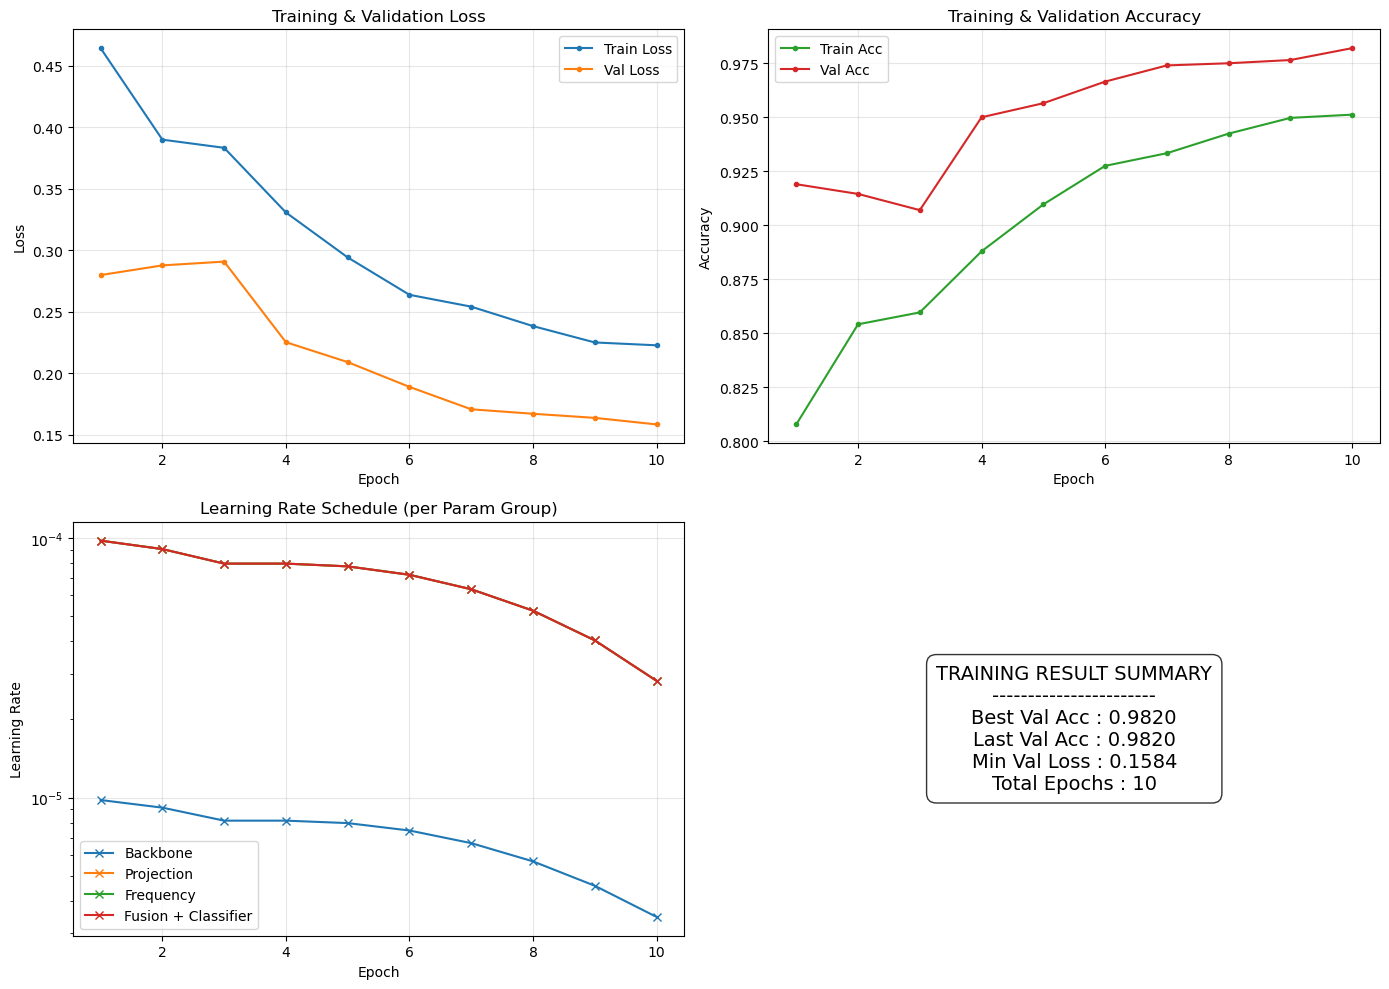

In [11]:
plot_training_history(hybrid_asym_trainer.history, hybrid_asym_cfg.LOG_DIR)

📊 Đã lưu biểu đồ Validation Metrics tại: ..\..\Outputs\efficientnet_fft_asym\logs\validation_metrics.png


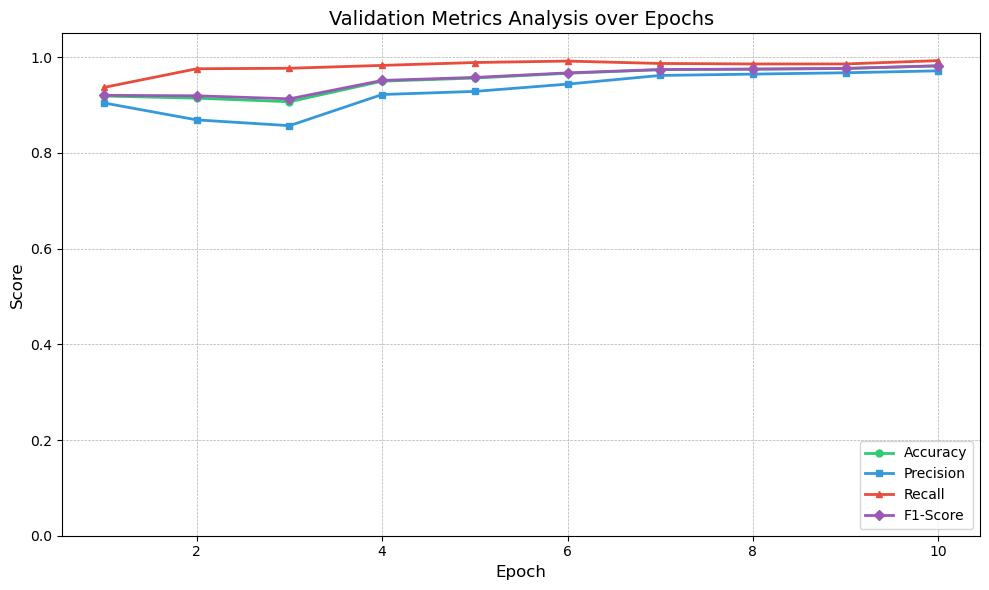

In [ ]:
plot_validation_metrics(hybrid_asym_trainer.history, hybrid_asym_cfg.LOG_DIR)

### Đánh giá mô hình - Evaluate


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 250/250 [01:24<00:00,  2.97it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9815
   Precision: 0.9684
   Recall   : 0.9955
   F1 Score : 0.9818

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       1.00      0.97      0.98      2000
        Fake       0.97      1.00      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\efficientnet_fft_asym\logs\evaluation_results\confusion_matrix.png


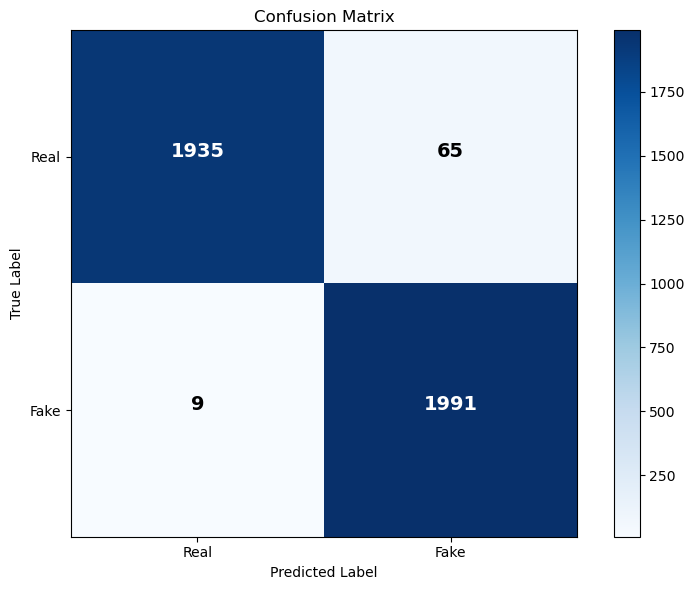

📉 Đã lưu ROC Curve tại: ..\..\Outputs\efficientnet_fft_asym\logs\evaluation_results\roc_curve.png


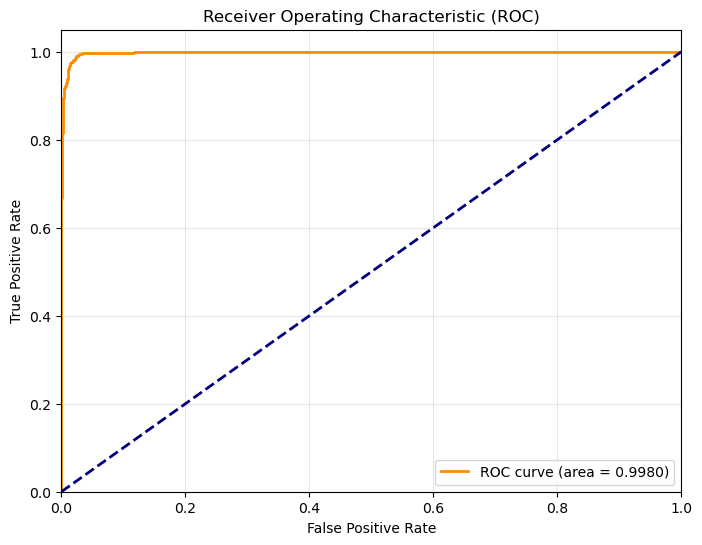

=== ROC AUC Score: 0.9980

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\efficientnet_fft_asym\logs\evaluation_results


In [14]:
evaluate_test_set(hybrid_asym_model, test_loader, GlobalConfig.DEVICE, hybrid_asym_cfg.LOG_DIR)

## Mô hình đối xứng

### Khởi tạo mô hình

In [10]:
print(f"Model name: {hybrid_sym_cfg.MODEL_NAME}")
print(f"Frequency dimension: {hybrid_sym_cfg.MODEL_CONFIG['freq_dim']}")
print(f"Spatial dimension: {hybrid_sym_cfg.MODEL_CONFIG['spatial_dim']}")
print(hybrid_sym_cfg.MODEL_CONFIG['use_attention_fusion'])

hybrid_sym_model = build_model(hybrid_sym_cfg)

hybrid_sym_trainer = Trainer(
    hybrid_sym_model, train_loader, val_loader, hybrid_sym_cfg
)

Model name: efficientnet_fft_sym
Frequency dimension: 512
Spatial dimension: 512
True
🛠️ Building Model | Mode: hybrid | Device: cuda


### Training

In [11]:
hybrid_sym_trainer.train()


STARTING TRAINING | Mode: hybrid

Epoch 1/10
[INFO] Freezing backbone at epoch 0
== Spatial Branch is now Frozen.


Validating: 100%|██████████| 125/125 [00:27<00:00,  4.62it/s]



Epoch 1/10 Summary
Train | Loss: 0.4819 | Acc: 0.7931 | F1: 0.7939
Val   | Loss: 0.2885 | Acc: 0.9140
      | Precision: 0.8906 | Recall: 0.9440 | F1: 0.9165
LR    | 0.000010
   New Best Val F1: 0.9165
== Best model saved.

Epoch 2/10


Validating: 100%|██████████| 125/125 [00:26<00:00,  4.65it/s]



Epoch 2/10 Summary
Train | Loss: 0.3950 | Acc: 0.8496 | F1: 0.8506
Val   | Loss: 0.3063 | Acc: 0.9035
      | Precision: 0.8587 | Recall: 0.9660 | F1: 0.9092
LR    | 0.000009
   Epochs without F1 improvement: 1/7

Epoch 3/10


Validating: 100%|██████████| 125/125 [00:25<00:00,  4.84it/s]



Epoch 3/10 Summary
Train | Loss: 0.3971 | Acc: 0.8456 | F1: 0.8467
Val   | Loss: 0.2749 | Acc: 0.9265
      | Precision: 0.9074 | Recall: 0.9500 | F1: 0.9282
LR    | 0.000008
   New Best Val F1: 0.9282
== Best model saved.

Epoch 4/10
[INFO] Unfreezing backbone at epoch 3
== Spatial Branch is now Unfrozen.


Validating: 100%|██████████| 125/125 [00:58<00:00,  2.15it/s]



Epoch 4/10 Summary
Train | Loss: 0.3400 | Acc: 0.8838 | F1: 0.8841
Val   | Loss: 0.2294 | Acc: 0.9445
      | Precision: 0.9189 | Recall: 0.9750 | F1: 0.9461
LR    | 0.000008
   New Best Val F1: 0.9461
== Best model saved.

Epoch 5/10


Validating: 100%|██████████| 125/125 [00:58<00:00,  2.12it/s]



Epoch 5/10 Summary
Train | Loss: 0.2991 | Acc: 0.9057 | F1: 0.9062
Val   | Loss: 0.2274 | Acc: 0.9480
      | Precision: 0.9140 | Recall: 0.9890 | F1: 0.9500
LR    | 0.000008
   New Best Val F1: 0.9500
== Best model saved.

Epoch 6/10


Validating: 100%|██████████| 125/125 [00:59<00:00,  2.11it/s]



Epoch 6/10 Summary
Train | Loss: 0.2719 | Acc: 0.9211 | F1: 0.9214
Val   | Loss: 0.1975 | Acc: 0.9605
      | Precision: 0.9340 | Recall: 0.9910 | F1: 0.9617
LR    | 0.000007
   New Best Val F1: 0.9617
== Best model saved.

Epoch 7/10


Validating: 100%|██████████| 125/125 [01:01<00:00,  2.04it/s]



Epoch 7/10 Summary
Train | Loss: 0.2571 | Acc: 0.9304 | F1: 0.9304
Val   | Loss: 0.1892 | Acc: 0.9665
      | Precision: 0.9447 | Recall: 0.9910 | F1: 0.9673
LR    | 0.000007
   New Best Val F1: 0.9673
== Best model saved.

Epoch 8/10


Validating: 100%|██████████| 125/125 [01:11<00:00,  1.76it/s]



Epoch 8/10 Summary
Train | Loss: 0.2410 | Acc: 0.9384 | F1: 0.9386
Val   | Loss: 0.1748 | Acc: 0.9730
      | Precision: 0.9566 | Recall: 0.9910 | F1: 0.9735
LR    | 0.000006
   New Best Val F1: 0.9735
== Best model saved.

Epoch 9/10


Validating: 100%|██████████| 125/125 [00:59<00:00,  2.09it/s]



Epoch 9/10 Summary
Train | Loss: 0.2323 | Acc: 0.9431 | F1: 0.9435
Val   | Loss: 0.1639 | Acc: 0.9765
      | Precision: 0.9640 | Recall: 0.9900 | F1: 0.9768
LR    | 0.000005
   New Best Val F1: 0.9768
== Best model saved.

Epoch 10/10


Validating: 100%|██████████| 125/125 [00:58<00:00,  2.12it/s]



Epoch 10/10 Summary
Train | Loss: 0.2274 | Acc: 0.9455 | F1: 0.9455
Val   | Loss: 0.1632 | Acc: 0.9795
      | Precision: 0.9687 | Recall: 0.9910 | F1: 0.9797
LR    | 0.000003
   New Best Val F1: 0.9797
== Best model saved.

Training Completed. Best F1: 0.9797
History saved to: ..\..\Outputs\efficientnet_fft_sym\logs\training_history.json


### Trực quan kết quả huấn luyện

📈 Đã lưu biểu đồ training tại: ..\..\Outputs\efficientnet_fft_sym\logs\training_history.png


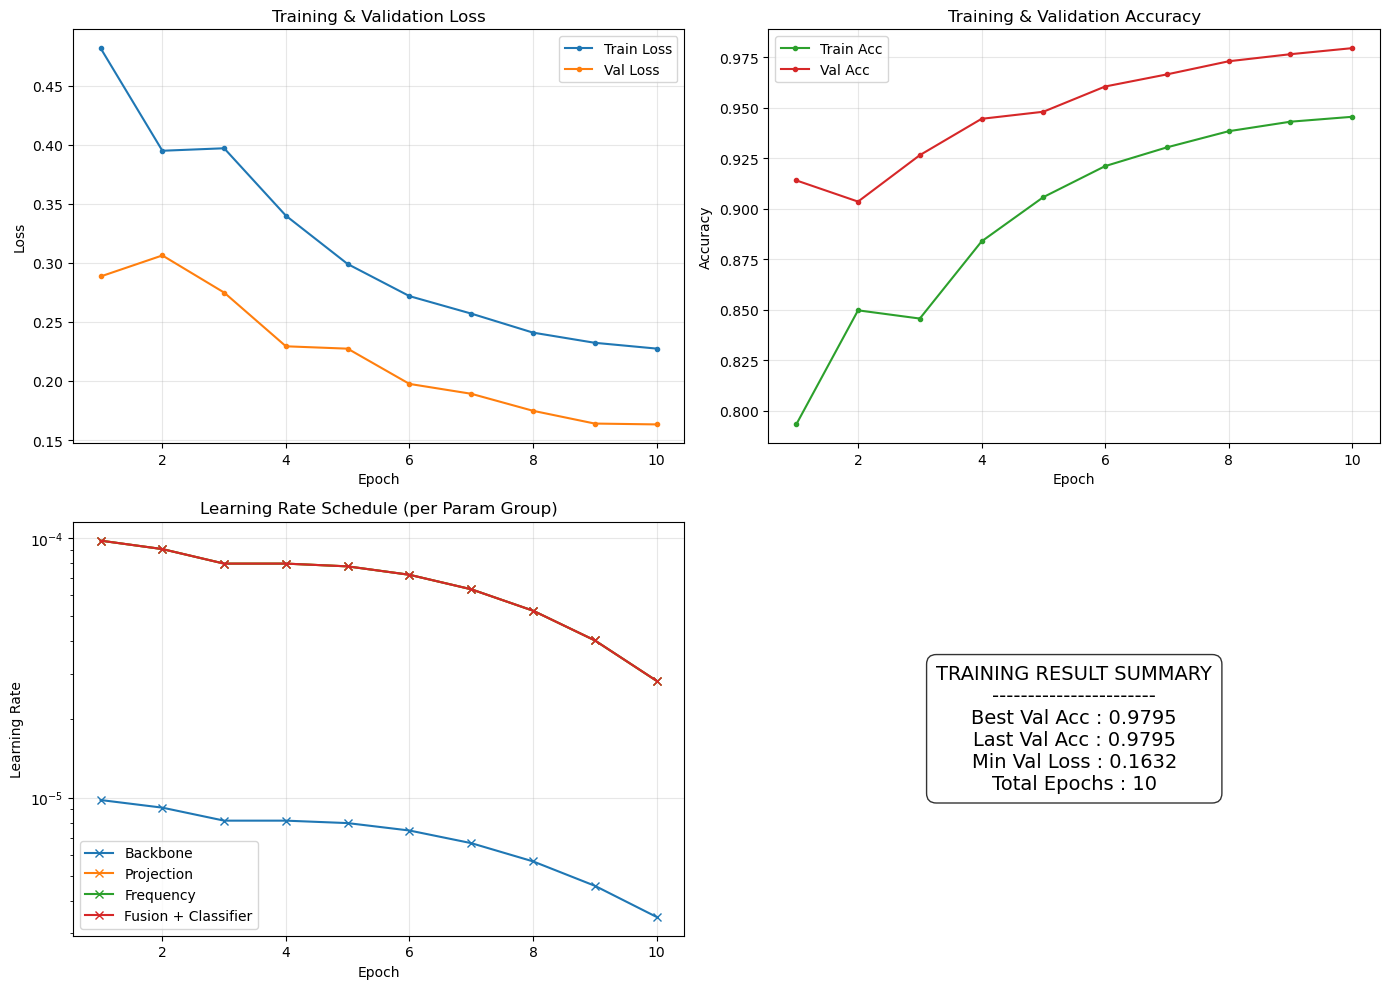

In [12]:
plot_training_history(hybrid_sym_trainer.history, hybrid_sym_cfg.LOG_DIR)

📊 Đã lưu biểu đồ Validation Metrics tại: ..\..\Outputs\efficientnet_fft_sym\logs\validation_metrics.png


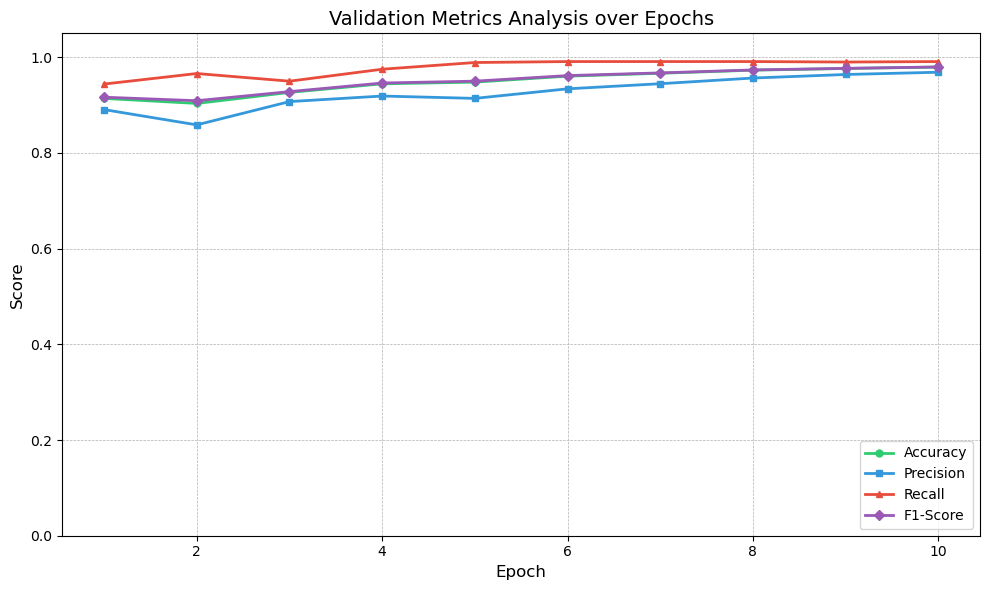

In [35]:
plot_validation_metrics(hybrid_sym_trainer.history, hybrid_sym_cfg.LOG_DIR)

### Đánh giá mô hình - Evaluate


BẮT ĐẦU ĐÁNH GIÁ TRÊN TẬP TEST


Testing: 100%|██████████| 250/250 [00:50<00:00,  4.94it/s]



📊 KẾT QUẢ ĐÁNH GIÁ:
   Accuracy : 0.9768
   Precision: 0.9600
   Recall   : 0.9950
   F1 Score : 0.9772

📋 Chi tiết theo lớp:
              precision    recall  f1-score   support

        Real       0.99      0.96      0.98      2000
        Fake       0.96      0.99      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

🔢 Đã lưu Confusion Matrix tại: ..\..\Outputs\efficientnet_fft_sym\logs\evaluation_results\confusion_matrix.png


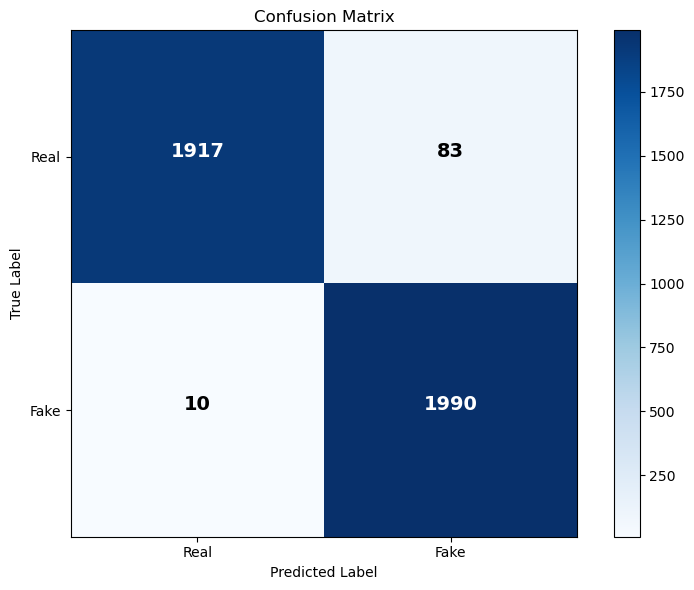

📉 Đã lưu ROC Curve tại: ..\..\Outputs\efficientnet_fft_sym\logs\evaluation_results\roc_curve.png


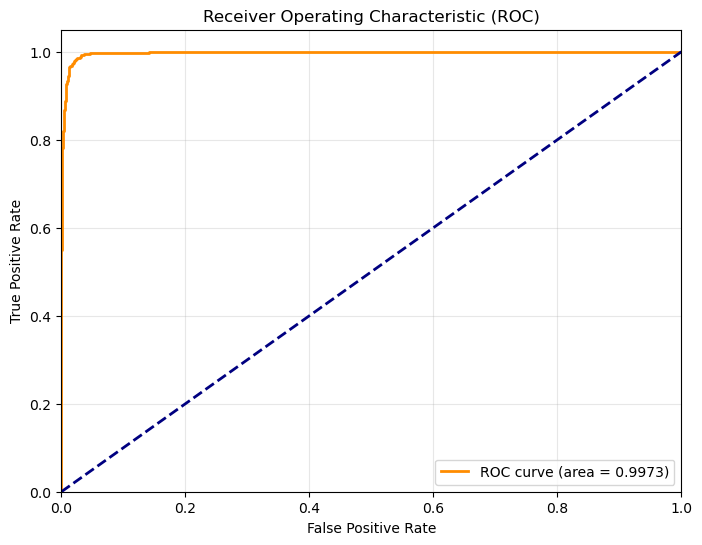

=== ROC AUC Score: 0.9973

Đã lưu toàn bộ kết quả đánh giá tại: ..\..\Outputs\efficientnet_fft_sym\logs\evaluation_results


In [13]:
evaluate_test_set(hybrid_sym_model, test_loader, GlobalConfig.DEVICE, hybrid_sym_cfg.LOG_DIR)

# So sánh các mô hình

## So sánh các chỉ số trên tập Test

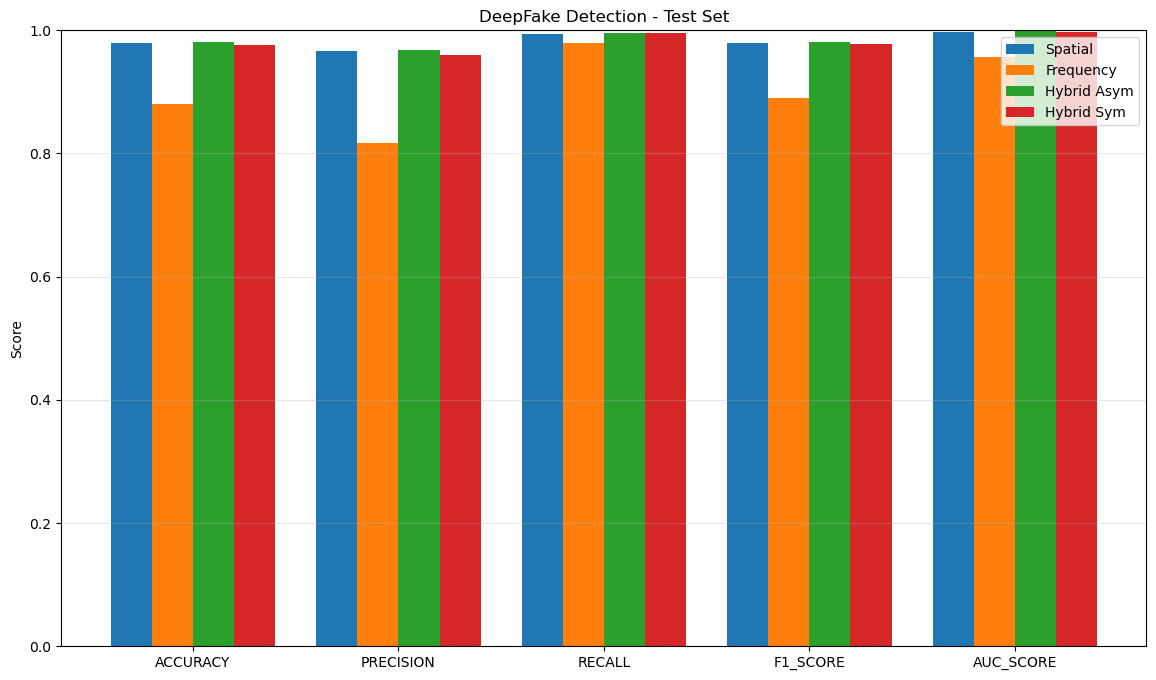

In [ ]:
def load_json_file(file_dict: str):
    """
    file_dict: str (path to a JSON file)

    Returns:
        dict {model_name: metrics_dict}
    """
    if isinstance(file_dict, str):
        with open(file_dict, "r") as f:
            data = json.load(f)
        return data

    elif isinstance(file_dict, dict):
        results = {}
        for model_name, path in file_dict.items():
            with open(path, "r") as f:
                results[model_name] = json.load(f)
        return results

    else:
        raise ValueError("file_dict must be str or dict")

def plot_test_metrics_bar(
    metrics_dict,
    metrics=("accuracy", "precision", "recall", "f1"),
    title="Model Comparison on Test Set",
    save_path=None,
    show=True
):
    """
    metrics_dict: {model_name: {metric: value}}
    """

    model_names = list(metrics_dict.keys())
    num_models = len(model_names)
    num_metrics = len(metrics)

    values = np.zeros((num_models, num_metrics))

    for i, model in enumerate(model_names):
        for j, metric in enumerate(metrics):
            values[i, j] = metrics_dict[model].get(metric, 0)

    x = np.arange(num_metrics)
    bar_width = 0.8 / num_models

    plt.figure(figsize=(14, 8))

    for i, model in enumerate(model_names):
        plt.bar(
            x + i * bar_width,
            values[i],
            width=bar_width,
            label=model
        )

    plt.xticks(
        x + bar_width * (num_models - 1) / 2,
        [m.upper() for m in metrics]
    )

    plt.ylabel("Score")
    plt.ylim(0, 1.0)
    plt.title(title)
    plt.legend()
    plt.grid(axis="y", alpha=0.3)

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=150)
        print(f"📊 Saved comparison chart to: {save_path}")

    if show:
        plt.show()

    plt.close()


metrics = load_json_file({
    "Spatial": Path(spatial_cfg.LOG_DIR) / "evaluation_results" / "test_metrics.json",
    "Frequency": Path(freq_cfg.LOG_DIR) / "evaluation_results" / "test_metrics.json",
    "Hybrid Asym": Path(hybrid_asym_cfg.LOG_DIR) / "evaluation_results" / "test_metrics.json",
    "Hybrid Sym": Path(hybrid_sym_cfg.LOG_DIR) / "evaluation_results" / "test_metrics.json"
})

plot_test_metrics_bar(
    metrics,
    metrics=("accuracy", "precision", "recall", "f1_score", "auc_score"), 
    title="DeepFake Detection - Test Set",
    save_path=None
)


## So sánh validation loss

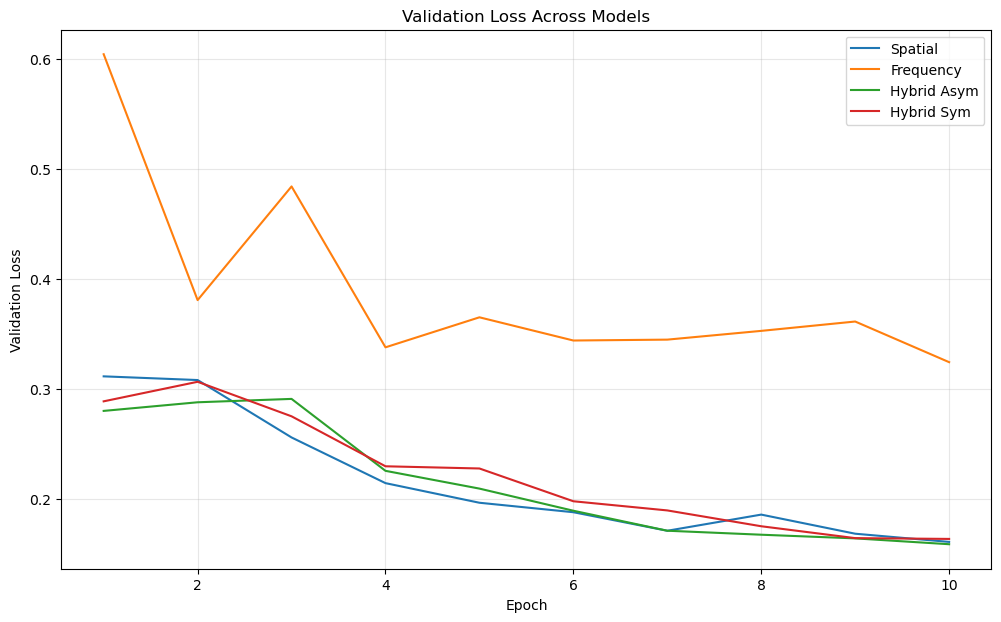

In [8]:
def load_val_loss(loss_file):
    """
    loss_file: path to json file

    Expected json format:
    {
        "val_loss": [float, float, ...]
    }
    """
    with open(loss_file, "r") as f:
        data = json.load(f)

    if "val_loss" not in data:
        raise KeyError(f"'val_loss' not found in {loss_file}")

    return data["val_loss"]


def plot_validation_losses(
    loss_sources,
    title="Validation Loss Comparison",
    save_path=None,
    show=True
):
    """
    loss_sources: dict
        {
            "Spatial": path_to_loss_json,
            "Frequency": path_to_loss_json,
            "Hybrid Asym": path_to_loss_json,
            "Hybrid Sym": path_to_loss_json
        }
    """

    plt.figure(figsize=(12, 7))

    for model_name, loss_path in loss_sources.items():
        val_loss = load_val_loss(loss_path)
        epochs = range(1, len(val_loss) + 1)

        plt.plot(
            epochs,
            val_loss,
            label=model_name
        )

    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)

    if save_path:
        Path(save_path).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, dpi=150)
        print(f"📉 Saved validation loss plot to: {save_path}")

    if show:
        plt.show()

    plt.close()

plot_validation_losses(
    {
        "Spatial": Path(spatial_cfg.LOG_DIR) / "training_history.json",
        "Frequency": Path(freq_cfg.LOG_DIR) / "training_history.json",
        "Hybrid Asym": Path(hybrid_asym_cfg.LOG_DIR) / "training_history.json",
        "Hybrid Sym": Path(hybrid_sym_cfg.LOG_DIR) / "training_history.json"
    },
    title="Validation Loss Across Models",
    save_path=None
)